In [3]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

<IPython.core.display.Javascript object>


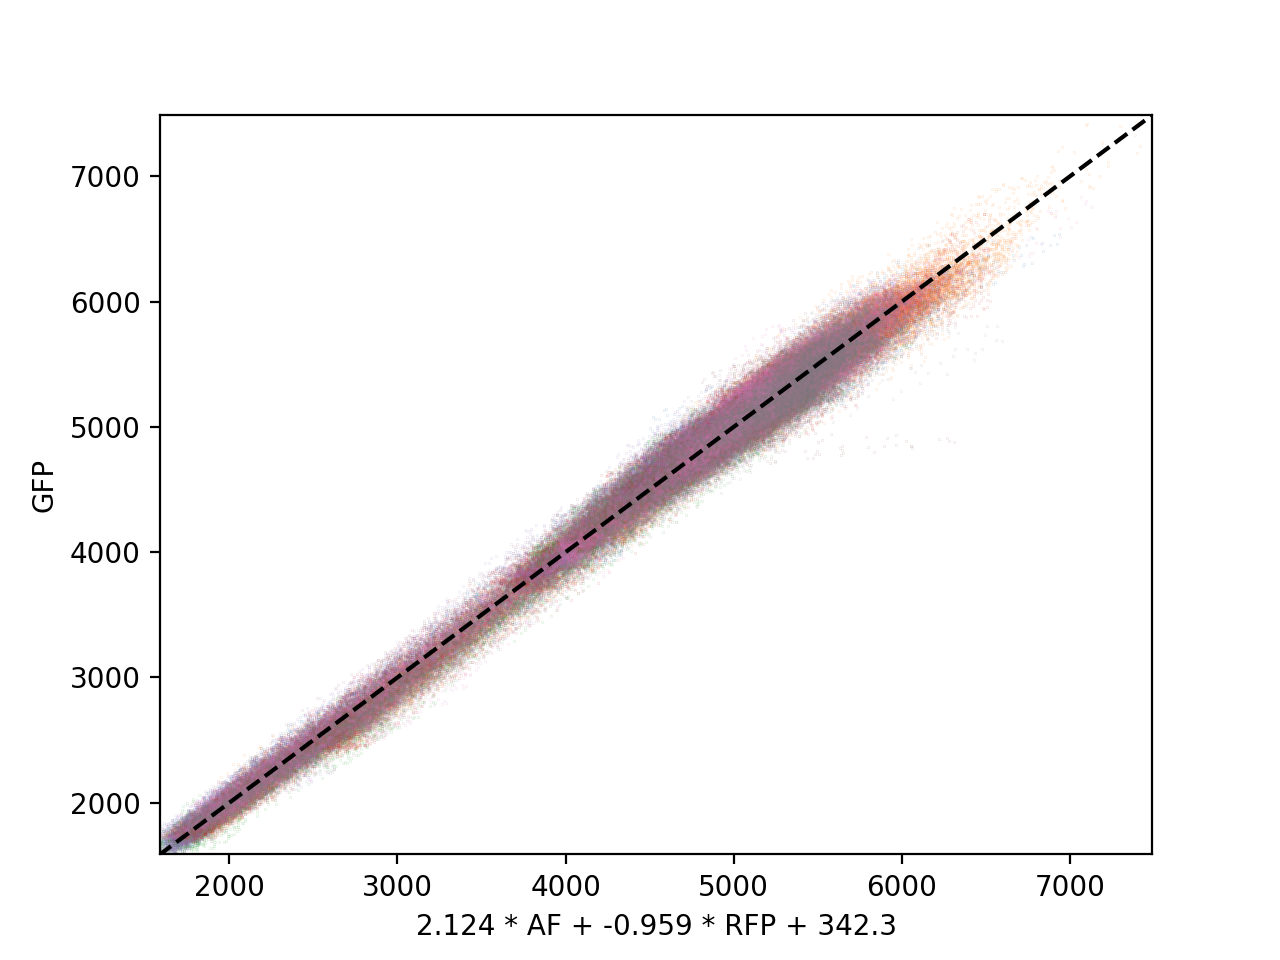

[2.1241273851513314, -0.9590114683534963, 342.337235890197]


In [5]:
n2_path = '/Users/blandt/Desktop/Data/PAR2 GFP linchpin/N2'
n2_paths = direcslist(n2_path, 1)

af = AfCorrelation(n2_paths, rfp_regex='*561 SP 630-75*', sigma=2, expand=10, method='OLS')
af.run()
af.plot_prediction()
print(af.params)

In [7]:
path = ['/Users/blandt/Desktop/Data/PAR2 GFP linchpin/N2',
       '/Users/blandt/Desktop/Data/PAR2 GFP linchpin/Experiment']
for p in direcslist(path, 1):
    ch1 = load_image(glob.glob(p + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(p + '/*488 SP 630-75*')[0])
    ch3 = load_image(glob.glob(p + '/*561 SP 630-75*')[0])
    af_corrected = af_subtraction_3channel(ch1, ch2, ch3, *af.params)
    save_img(af_corrected, p + '/af_corrected.tif')